# 3440. Reschedule Meetings for Maximum Free Time II

You are given an integer eventTime denoting the duration of an event. You are also given two integer arrays startTime and endTime, each of length n.

These represent the start and end times of n non-overlapping meetings that occur during the event between time t = 0 and time t = eventTime, where the ith meeting occurs during the time [startTime[i], endTime[i]].

You can reschedule at most one meeting by moving its start time while maintaining the same duration, such that the meetings remain non-overlapping, to maximize the longest continuous period of free time during the event.

Return the maximum amount of free time possible after rearranging the meetings.

Note that the meetings can not be rescheduled to a time outside the event and they should remain non-overlapping.

Note: In this version, it is valid for the relative ordering of the meetings to change after rescheduling one meeting.

Example 1:

Input: eventTime = 5, startTime = [1,3], endTime = [2,5]

Output: 2

Explanation:

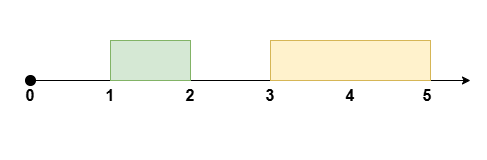


Reschedule the meeting at [1, 2] to [2, 3], leaving no meetings during the time [0, 2].

Example 2:

Input: eventTime = 10, startTime = [0,7,9], endTime = [1,8,10]

Output: 7

Explanation:

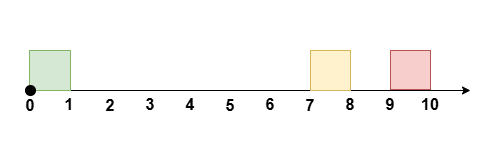

Reschedule the meeting at [0, 1] to [8, 9], leaving no meetings during the time [0, 7].

Example 3:

Input: eventTime = 10, startTime = [0,3,7,9], endTime = [1,4,8,10]

Output: 6

Explanation:

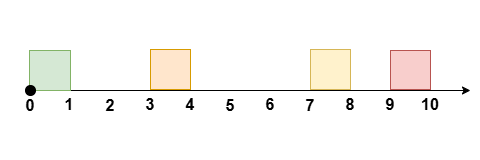

Reschedule the meeting at [3, 4] to [8, 9], leaving no meetings during the time [1, 7].

Example 4:

Input: eventTime = 5, startTime = [0,1,2,3,4], endTime = [1,2,3,4,5]

Output: 0

Explanation:

There is no time during the event not occupied by meetings.

Constraints:

1 <= eventTime <= 109
n == startTime.length == endTime.length
2 <= n <= 105
0 <= startTime[i] < endTime[i] <= eventTime
endTime[i] <= startTime[i + 1] where i lies in the range [0, n - 2].

In [33]:
eventTime = 41
startTime = [17, 24]
endTime = [19, 25]

n = len(startTime)
gaps = []             # List to store lengths of breaks (inactive intervals)
meetings = [0] * (n + 1)  # 1-based indexing for meeting durations
last_end = 0          # Tracks the end time of the last interval

# Calculate the lengths of breaks between active intervals and store meeting durations
for i in range(1, n + 1):
    meetings[i] = (endTime[i - 1] - startTime[i - 1])          # Meeting duration
    gaps.append(startTime[i - 1] - last_end)                   # Gap before current meeting
    last_end = endTime[i - 1]                                  # Update last_end to current meeting's end

# Add the final break after the last meeting until the end of the event
gaps.append(eventTime - last_end)

# Suffix max gap from i+1 to end
suffix_max = [0] * (n + 1)
for i in range(n - 1, 0, -1):
    suffix_max[i] = max(suffix_max[i + 1], gaps[i + 1])       # Max of future gaps

# Prefix max gap from start to i-2
prefix_max = [0] * (n + 1)
for i in range(2, n + 1):
    prefix_max[i] = max(prefix_max[i - 1], gaps[i - 2])        # Max of previous gaps

res = 0  # Stores the maximum continuous free time achievable

# Try shifting each meeting and see if it fits in any neighboring gap to maximize free time
for i in range(1, n + 1):
    if meetings[i] <= max(prefix_max[i], suffix_max[i]):       # If meeting fits in some gap
        res = max(res, gaps[i - 1] + gaps[i] + meetings[i])    # Shift it and merge neighboring gaps
    else:
        res = max(res, gaps[i - 1] + gaps[i])                  # Can't shift, just merge current two gaps

res  # Final result: maximum continuous free time



24

In [28]:
meetings

[0, 2, 1]

In [29]:
prefix_max

[0, 0, 17]

In [30]:
suffix_max

[0, 16, 0]

In [31]:
gaps

[17, 5, 16]

In [32]:
n

2